In [1]:
!conda install -c conda-forge msprime

Solving environment: done

# All requested packages already installed.



In [103]:
import msprime
from IPython.display import SVG, display
import matplotlib.pyplot as plt

# Single site coalescent simulation

## Ancestry simulation

In [17]:
t = msprime.sim_ancestry(samples=2, population_size=100, sequence_length = 1e4, random_seed=1234)

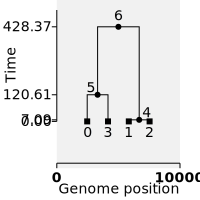

In [18]:
SVG(t.draw_svg(y_axis=True))

## Get information from tree

In [75]:
tree = t.first()

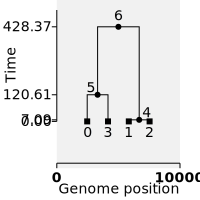

In [76]:
SVG(t.draw_svg(y_axis=True))

In [77]:
tree.root

6

In [78]:
tree.sample_size

4

In [79]:
tree.time(5)

120.61070914045273

In [80]:
tree.parent(5)

6

In [83]:
tree.parent(6)

-1

In [81]:
tree.children(5)

(0, 3)

In [82]:
tree.children(3)

()

# Mutation simulation

In [19]:
mt = msprime.sim_mutations(t, rate=2e-6, random_seed=5678)

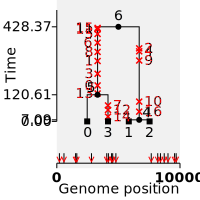

In [20]:
SVG(mt.draw_svg(y_axis=True))

## Tree simplification

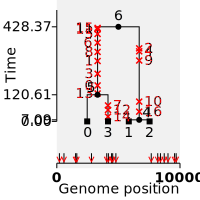

In [21]:
SVG(mt.draw_svg(y_axis=True))

In [22]:
simplified_mt = mt.simplify(samples=[0, 1])

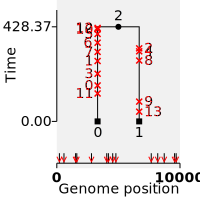

In [23]:
SVG(simplified_mt.draw_svg(y_axis=True))

## mutation information

In [24]:
mt.genotype_matrix()

array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 1, 0]], dtype=int8)

In [25]:
for v in mt.variants():
    print(v)

Variant(site=Site(id=0, position=212.0, ancestral_state='G', mutations=[Mutation(id=0, site=0, node=5, derived_state='T', parent=-1, metadata=b'', time=162.73164164891477)], metadata=b''), alleles=('G', 'T'), genotypes=array([1, 0, 0, 1], dtype=int8))
Variant(site=Site(id=1, position=582.0, ancestral_state='A', mutations=[Mutation(id=1, site=1, node=5, derived_state='G', parent=-1, metadata=b'', time=273.4289356037654)], metadata=b''), alleles=('A', 'G'), genotypes=array([1, 0, 0, 1], dtype=int8))
Variant(site=Site(id=2, position=1526.0, ancestral_state='C', mutations=[Mutation(id=2, site=2, node=4, derived_state='A', parent=-1, metadata=b'', time=330.7743973658487)], metadata=b''), alleles=('C', 'A'), genotypes=array([0, 1, 1, 0], dtype=int8))
Variant(site=Site(id=3, position=1624.0, ancestral_state='C', mutations=[Mutation(id=3, site=3, node=5, derived_state='G', parent=-1, metadata=b'', time=215.69834625510288)], metadata=b''), alleles=('C', 'G'), genotypes=array([1, 0, 0, 1], dtype

In [ ]:
mt.write_vcf(output = "mt.vcf")

In [ ]:
mt.write_fasta(output = "mt.fa")

# Coalescent with recombination

In [27]:
ts = msprime.sim_ancestry(samples=2, population_size=100, sequence_length = 1e4, recombination_rate=1e-6, random_seed = 1234)

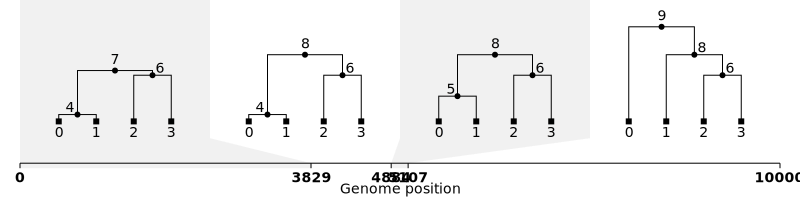

In [28]:
SVG(ts.draw_svg(y_axis=False))

In [29]:
mts = msprime.sim_mutations(ts, rate=2e-6, random_seed=5678)

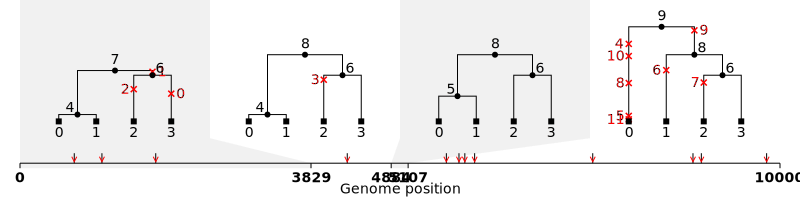

In [30]:
SVG(mts.draw_svg(y_axis=False))

## Look at marginal tree(s)

In [41]:
for tree in mts.trees():
    print(tree.interval, tree.span)

Interval(left=0.0, right=3829.0) 3829.0
Interval(left=3829.0, right=4884.0) 1055.0
Interval(left=4884.0, right=5107.0) 223.0
Interval(left=5107.0, right=10000.0) 4893.0


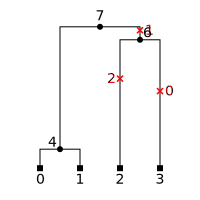

In [31]:
tree = mts.at(3000)
SVG(tree.draw_svg(y_axis = False))

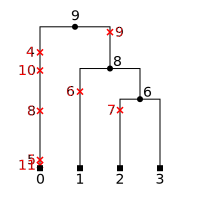

In [32]:
tree = mts.at_index(3)
SVG(tree.draw_svg(y_axis = False))

## Tree sequence simplification

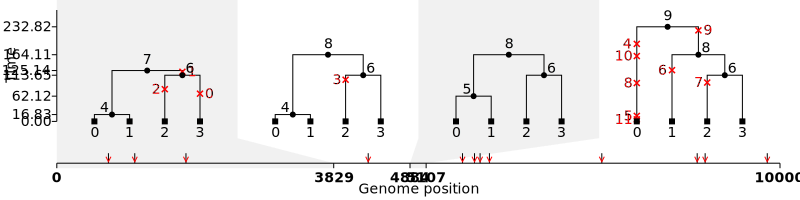

In [33]:
SVG(mts.draw_svg(y_axis=True))

In [34]:
simplified_mts = mts.simplify([0, 1])

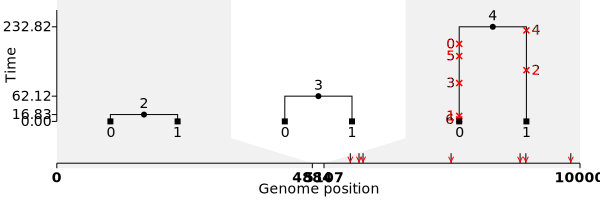

In [35]:
SVG(simplified_mts.draw_svg(y_axis=True))

# Extensions to standard coalescent

## Rate heterogeneity

In [105]:
rate_map = msprime.RateMap(position=[0, 5000, 10000], rate=[0, 2e-6])
rate_map

left,right,mid,span,rate
0,5000,2500,5000,0.00
5000,10000,7500,5000,0.00


In [90]:
ts = msprime.sim_ancestry(samples=2, population_size=100, sequence_length = 1e4, recombination_rate=rate_map, random_seed = 1234)

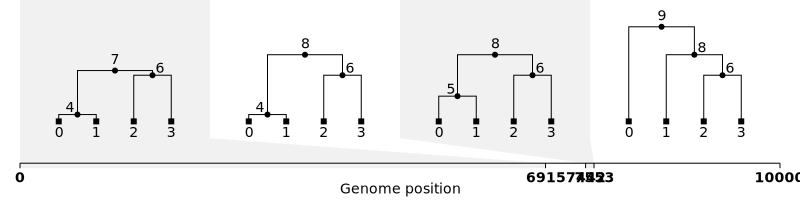

In [91]:
SVG(ts.draw_svg(y_axis=False))

## Mutation models

In [94]:
model = msprime.JC69()
mts = msprime.sim_mutations(ts, rate = 2e-6, model = model, random_seed = 5678)

In [95]:
for v in mts.variants():
    print(v)

Variant(site=Site(id=0, position=714.0, ancestral_state='A', mutations=[Mutation(id=0, site=0, node=3, derived_state='T', parent=-1, metadata=b'', time=68.25016156236117)], metadata=b''), alleles=('A', 'T'), genotypes=array([0, 0, 0, 1], dtype=int8))
Variant(site=Site(id=1, position=1786.0, ancestral_state='T', mutations=[Mutation(id=1, site=1, node=2, derived_state='A', parent=-1, metadata=b'', time=79.27543024570147)], metadata=b''), alleles=('T', 'A'), genotypes=array([0, 0, 1, 0], dtype=int8))
Variant(site=Site(id=2, position=1946.0, ancestral_state='A', mutations=[Mutation(id=2, site=2, node=6, derived_state='C', parent=-1, metadata=b'', time=122.10487666342334)], metadata=b''), alleles=('A', 'C'), genotypes=array([0, 0, 1, 1], dtype=int8))
Variant(site=Site(id=3, position=4306.0, ancestral_state='C', mutations=[Mutation(id=3, site=3, node=2, derived_state='G', parent=-1, metadata=b'', time=102.56540921302496)], metadata=b''), alleles=('C', 'G'), genotypes=array([0, 0, 1, 0], dtyp

In [96]:
model = msprime.BinaryMutationModel()
mts = msprime.sim_mutations(ts, rate = 2e-6, model = model, random_seed = 5678)

In [97]:
for v in mts.variants():
    print(v)

Variant(site=Site(id=0, position=714.0, ancestral_state='0', mutations=[Mutation(id=0, site=0, node=3, derived_state='1', parent=-1, metadata=b'', time=68.25016156236117)], metadata=b''), alleles=('0', '1'), genotypes=array([0, 0, 0, 1], dtype=int8))
Variant(site=Site(id=1, position=1786.0, ancestral_state='0', mutations=[Mutation(id=1, site=1, node=2, derived_state='1', parent=-1, metadata=b'', time=79.27543024570147)], metadata=b''), alleles=('0', '1'), genotypes=array([0, 0, 1, 0], dtype=int8))
Variant(site=Site(id=2, position=1946.0, ancestral_state='0', mutations=[Mutation(id=2, site=2, node=6, derived_state='1', parent=-1, metadata=b'', time=122.10487666342334)], metadata=b''), alleles=('0', '1'), genotypes=array([0, 0, 1, 1], dtype=int8))
Variant(site=Site(id=3, position=4306.0, ancestral_state='0', mutations=[Mutation(id=3, site=3, node=2, derived_state='1', parent=-1, metadata=b'', time=102.56540921302496)], metadata=b''), alleles=('0', '1'), genotypes=array([0, 0, 1, 0], dtyp

## Demography models

### Population splits

In [69]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=1000)
demography.add_population(name="B", initial_size=1000)
demography.add_population(name="C", initial_size=1000)
demography.add_population_split(time=20000, derived=["A", "B"], ancestral="C")
ts = msprime.sim_ancestry(samples={"A": 2, "B": 2}, demography=demography, random_seed=1234)

In [110]:
demography

Demography(populations=[Population(initial_size=1000, growth_rate=0, name='A', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=1000, growth_rate=0, name='B', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=1000, growth_rate=0, name='C', description='', extra_metadata={}, default_sampling_time=20000, initially_active=False, id=2)], events=[PopulationSplit(time=20000, derived=['A', 'B'], ancestral='C')], migration_matrix=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]))

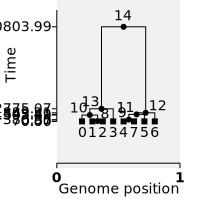

In [70]:
SVG(ts.draw_svg(y_axis=True))

# Population growth

In [116]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=1000, growth_rate=0.01)

Population(initial_size=1000, growth_rate=0.01, name='A', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0)

In [117]:
demography

id,name,description,initial_size,growth_rate,default_sampling_time,extra_metadata
0,A,,1000.0,0.01,0,{}


## Admixture

In [111]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=100)
demography.add_population(name="B", initial_size=100)
demography.add_population(name="ADMIX", initial_size=100)
demography.add_population(name="ANC", initial_size=100)
demography.add_admixture(
    time=10, derived="ADMIX", ancestral=["A", "B"], proportions=[0.25, 0.75])
demography.add_population_split(time=20, derived=["A", "B"], ancestral="ANC")

PopulationSplit(time=20, derived=['A', 'B'], ancestral='ANC')

In [112]:
demography

Demography(populations=[Population(initial_size=100, growth_rate=0, name='A', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100, growth_rate=0, name='B', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=100, growth_rate=0, name='ADMIX', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=100, growth_rate=0, name='ANC', description='', extra_metadata={}, default_sampling_time=20, initially_active=False, id=3)], events=[Admixture(time=10, derived='ADMIX', ancestral=['A', 'B'], proportions=[0.25, 0.75]), PopulationSplit(time=20, derived=['A', 'B'], ancestral='ANC')], migration_matrix=array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]))

## Migration

In [118]:
demography = msprime.Demography.isolated_model([100, 100])
demography.set_migration_rate(source=0, dest=1, rate=0.1)

In [119]:
demography

Demography(populations=[Population(initial_size=100.0, growth_rate=0.0, name='pop_0', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100.0, growth_rate=0.0, name='pop_1', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1)], events=[], migration_matrix=array([[0. , 0.1],
       [0. , 0. ]]))